# Skills Unlocked
- Data Scraping
- Data Cleaning 
- Data Exploration
- Data Visualization & Presentation
- Data Analysis & Insights

# Objectives
**Exploring econ data using Fred API:**
1. Unemployment vs. Participation Rate (Guided by https://www.youtube.com/watch?v=R67XuYc9NQ4 | Source Code: https://www.kaggle.com/code/robikscube/economic-analysis-with-pandas-youtube-tutorial/notebook) 
2. How unemployment rate affect the return of SP500 (Unguided)
3. How bonds affect the return of SP500 (Unguided)
4. How the fed rate & inflation affect the return of SP500 (Unguided)


## Importing Libs

In [2]:
import pandas as pd
import numpy as np 

# Data
from fredapi import Fred 
fred = Fred(api_key='90e9e49b1e97108193493ea0ee418912')

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="darkgrid")


## Searching & Selecting The Benchmark 

In [3]:
pop_df = fred.search('S&P', order_by='popularity')
pop_df.info() # default is 1000 rows by 15 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, BAMLH0A0HYM2 to DDEM01BWA156NWDB
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object  

In [4]:
pop_df.head() # show first 5 rows

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-08-15,2022-08-15,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-08-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-15 09:03:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-08-15,2022-08-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-07-26 08:02:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-08-15,2022-08-15,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-08-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-15 09:03:09-05:00,83,This data represents the effective yield of th...
SP500,SP500,2022-08-15,2022-08-15,S&P 500,2012-08-16,2022-08-15,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-08-15 19:10:58-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-08-15,2022-08-15,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,80,Household data are collected as of March. As ...


In [5]:
# Select the S&P 500
sp500 = fred.get_series(series_id='SP500') 

Text(0.5, 1.0, 'S&P 500')

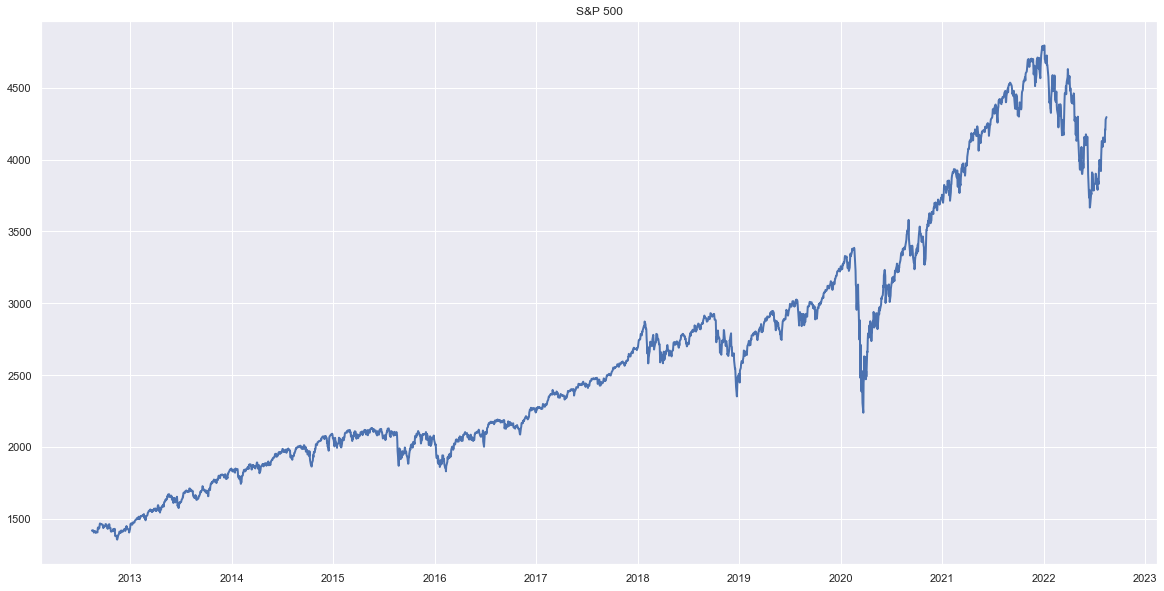

In [6]:
# Plotting the SP500 in line chart
sns.set(rc={'figure.figsize':(20,10), 'lines.linewidth': 2}) # might be better if put it after importing seaborn
sns.lineplot(data=sp500).set_title('S&P 500')

## Preparing Unemployment Rate Data
- **Notice the inconsistencies:**
    - The column of "seasonal_adjustment" contains *Not Seasonally Adjusted* & *Seasonally Adjusted* (for short term analysis, seasonal adjustment data will be best.)
    - The "frequency_short" column contains *Week|Month|Quarterly|Annual* (unemployment rate comes out every month so monthly)
    - The "units" column contains *percentage|number* (% to better gauge at the changes)

In [32]:
# search any thing that is relate to unemployment to explore the available data provided by FRED 
unrate_states = fred.search('unemployment rate state')
# query the necessary data to get the only monthly data, seasonal adjustment, and units as percent
unrate_states = unrate_states.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" and frequency == "Monthly"') # Notice the rows shrunk down in size & the selected data needs to be exact 
# select title conlumn but only relevent the Unemployment Rate (str) then locate where that is true
unrate_states = unrate_states.loc[unrate_states['title'].str.contains('Unemployment Rate in')] 
# get rid of repetitive columns such as the seasonality adjustment shorts so anything that has _shorts at the end (optional)
unrate_states = unrate_states.drop(['seasonal_adjustment_short','frequency_short','units_short'], axis=1)
# get rid of the rows that contains the following words "DISCONTINUED", "Region","Division","District" in the title column
unrate_states = unrate_states.drop(unrate_states[unrate_states['title'].str.contains('|'.join(['DISCONTINUED','Region','Division','District', 'Puerto']))].index) 
# sort by most popular
unrate_states = unrate_states.sort_values(by='popularity', ascending=False)
# get rid of the rows that contains numeric values in the id column
unrate_states = unrate_states.drop(unrate_states[unrate_states['id'].str.contains('\d')].index)

unrate_states # So cleaaaaaaaan OMG!

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,units,seasonal_adjustment,last_updated,popularity,notes
series id,,,,,,,,,,,,
CAUR,CAUR,2022-08-15,2022-08-15,Unemployment Rate in California,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:01-05:00,53,None
FLUR,FLUR,2022-08-15,2022-08-15,Unemployment Rate in Florida,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:02-05:00,48,None
TXUR,TXUR,2022-08-15,2022-08-15,Unemployment Rate in Texas,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:03-05:00,44,None
NYUR,NYUR,2022-08-15,2022-08-15,Unemployment Rate in New York,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,43,None
OHUR,OHUR,2022-08-15,2022-08-15,Unemployment Rate in Ohio,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,40,None
MIUR,MIUR,2022-08-15,2022-08-15,Unemployment Rate in Michigan,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,36,None
PAUR,PAUR,2022-08-15,2022-08-15,Unemployment Rate in Pennsylvania,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:06-05:00,35,None
ALUR,ALUR,2022-08-15,2022-08-15,Unemployment Rate in Alabama,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:07-05:00,32,None
MAUR,MAUR,2022-08-15,2022-08-15,Unemployment Rate in Massachusetts,1976-01-01,2022-06-01,Monthly,Percent,Seasonally Adjusted,2022-07-25 09:42:05-05:00,31,None


In [33]:
unrate_states.shape # rows should be 50 states

(50, 12)

In [74]:
# for each state, get the data & combine into a single dataframe
all_state_unrate = []
for ea_state in unrate_states['id']:
    r = fred.get_series(series_id=ea_state)
    r = pd.DataFrame(r) 
    all_state_unrate.append(r)



In [89]:
# combine all the unrate data into a single dataframe
all_state_unrate_df = pd.concat(all_state_unrate, axis=1)
# rename the rows to the state name
all_state_unrate_df.columns = unrate_states['title']
# remove the words "Unemployment Rate in" from the state name
all_state_unrate_df.columns = all_state_unrate_df.columns.str.replace('Unemployment Rate in ', '')
# remove the word "title"
all_state_unrate_df

title,California,Florida,Texas,New York,Ohio,Michigan,Pennsylvania,Alabama,Massachusetts,Arizona,...,Kentucky,Hawaii,Idaho,Maine,Delaware,Rhode Island,Kansas,South Dakota,Vermont,New Hampshire
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.6,10.5,10.2,...,5.6,9.8,5.6,8.7,8.0,7.8,4.2,3.3,8.6,6.5
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.6,10.5,10.2,...,5.6,9.8,5.6,8.7,8.0,7.8,4.2,3.3,8.6,6.5
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.6,10.5,10.1,...,5.6,9.8,5.6,8.6,8.0,7.7,4.2,3.2,8.6,6.5
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.5,10.3,10.0,...,5.6,9.7,5.6,8.6,8.1,7.7,4.2,3.1,8.6,6.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.4,10.1,9.8,...,5.5,9.4,5.6,8.5,8.3,7.7,4.2,3.1,8.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,5.3,3.3,4.7,4.9,4.2,4.7,5.1,3.0,4.7,3.6,...,4.2,4.2,2.8,4.0,4.6,3.9,2.5,2.6,2.9,2.7
2022-03-01,4.8,3.2,4.4,4.6,4.1,4.4,4.9,2.9,4.3,3.3,...,4.0,4.1,2.7,3.6,4.5,3.4,2.4,2.5,2.6,2.4
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.3,4.8,2.8,4.1,3.2,...,3.9,4.1,2.6,3.3,4.5,3.2,2.4,2.3,2.5,2.3
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.3,4.6,2.7,3.9,3.2,...,3.8,4.1,2.5,3.2,4.5,2.9,2.3,2.3,2.3,2.1


In [85]:
px.line(all_state_unrate_df)

## Most Recent Unemployment Rate Per State


## Unemployment Rate Vs. The S&P500 (Not Yet Started)

## Bonds Vs. The S&P500 (Not Yet Started)

## Fed Rate | Inflation Vs. The S&P500 (Not Yet Started)